# Workshop: Implement the KNN algorithm to classify the digits correctly

Authors: 
1. Marcos Qucihimbo 
2. Sthevven Morales 

# KNN: Handwrittend digit recognition 

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt



 1: Data Preprocessing

In [3]:
# Load the MNIST dataset from sklearn
digits = datasets.load_digits()

# Extract features and labels
X, y = digits.data, digits.target

# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Show the shapes to confirm the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1437, 64), (360, 64), (1437,), (360,))

 2: Model Building

In [6]:
# Initialize variables to store cross-validation scores and corresponding k values
cv_scores = []
k_values = list(range(1, 21))  # We will try k from 1 to 20

# Perform cross-validation for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=2, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the k with the highest cross-validation accuracy
best_k = k_values[np.argmax(cv_scores)]
best_k, max(cv_scores)


(1, 0.9812122996579125)

In [11]:
cv_scores

[0.9812122996579125,
 0.9714678387267986,
 0.9756470802453112,
 0.9728644705390108,
 0.9700799237566877,
 0.9645156728820978,
 0.9672992511264098,
 0.9638192940520143,
 0.9624265363918472,
 0.9596439266855468,
 0.9603403055156303,
 0.9575576958093297,
 0.955468559319079,
 0.9554695278570903,
 0.9533823284428621,
 0.951989570782695,
 0.9540787072729456,
 0.9512951290286339,
 0.9485105822463108,
 0.9478180775682723]

3: Model Evaluation

In [12]:
# Initialize the KNN classifier with the best k value
knn_best = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_best.predict(X_test)

# Calculate and display the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

#accuracy, precision, recall, f1
print("accuracy: ", accuracy,
      "\nprecision: ", precision,
      "\nrecall: ", recall,
      "\nf1-score", f1)


accuracy:  0.9833333333333333 
precision:  0.9834985471715754 
recall:  0.9833333333333333 
f1-score 0.9832256044170081


 4: Visualization

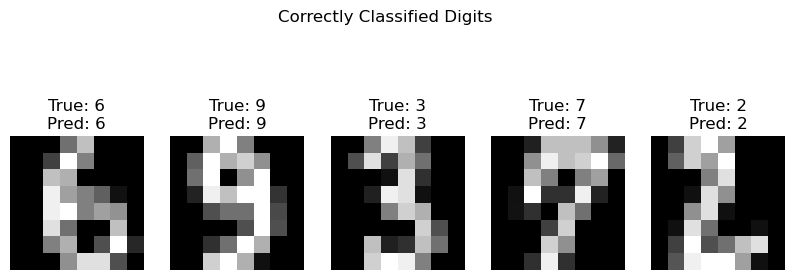

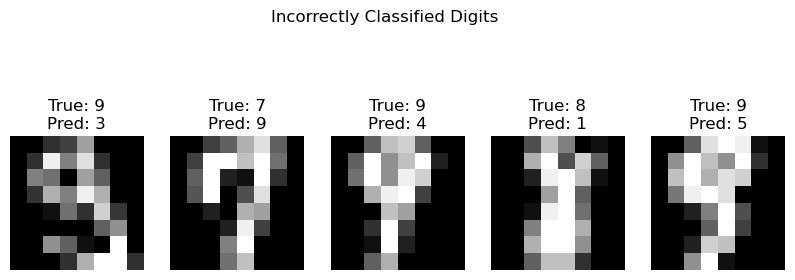

In [13]:
# Initialize variables to store indices of correctly and incorrectly classified samples
correct_indices = []
incorrect_indices = []

# Find indices of correctly and incorrectly classified samples
for i, (true_label, pred_label) in enumerate(zip(y_test, y_pred)):
    if true_label == pred_label:
        correct_indices.append(i)
    else:
        incorrect_indices.append(i)

# Function to plot digits
def plot_digits(indices, title):
    plt.figure(figsize=(10, 4))
    for index, item in enumerate(indices[:5]):
        plt.subplot(1, 5, index + 1)
        plt.imshow(X_test[item].reshape(8, 8), cmap='gray')
        plt.title(f"True: {y_test[item]}\nPred: {y_pred[item]}")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

# Plot some correctly classified digits
plot_digits(correct_indices, "Correctly Classified Digits")

# Plot some incorrectly classified digits
plot_digits(incorrect_indices, "Incorrectly Classified Digits")
